In [1]:
from tensorflow.keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, SeparableConv1D, MaxPool2D, LeakyReLU, Dense, Activation, Flatten, InputLayer, Dropout
import tensorflow
import pandas as pd
import numpy as np
from numpy import array
from numpy import hstack
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [2]:
# loading the dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
#visualizing the data
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)

MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [4]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
# creating one hot encoded values
one_hot_encoded_Y_train = pd.get_dummies(Y_train)

one_hot_encoded_Y_test = pd.get_dummies(Y_test)

one_hot_encoded_Y_test.shape

(10000, 10)

In [6]:
#setting a variable for the input of the neural network
shape = X_train.shape[1:]
shape

(28, 28)

In [7]:
# We will set the range of possible values between 0 and 1 as it will increase accuracy.
X_train = X_train.astype('float32')/255.0

X_test = X_test.astype('float32')/255.0

In [8]:
# Creating a simple artificial neural network
model_ann = Sequential()
model_ann.add(Flatten(input_shape=(28,28)))
model_ann.add(Dropout(0.1))
model_ann.add(Dense(20, activation='relu'))
model_ann.add(Dense(10, activation='softmax'))


In [9]:
model_ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


In [10]:
#compiling the network
model_ann.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

Epoch 1/300
422/422 [==============================] - 1s 1ms/step - loss: 0.6494 - accuracy: 0.8168 - val_loss: 0.2708 - val_accuracy: 0.9252
Epoch 2/300
422/422 [==============================] - 1s 1ms/step - loss: 0.3077 - accuracy: 0.9115 - val_loss: 0.2149 - val_accuracy: 0.9397
Epoch 3/300
422/422 [==============================] - 1s 1ms/step - loss: 0.2639 - accuracy: 0.9244 - val_loss: 0.1932 - val_accuracy: 0.9468
Epoch 4/300
422/422 [==============================] - 1s 1ms/step - loss: 0.2371 - accuracy: 0.9312 - val_loss: 0.1776 - val_accuracy: 0.9508
Epoch 5/300
422/422 [==============================] - 1s 1ms/step - loss: 0.2183 - accuracy: 0.9369 - val_loss: 0.1680 - val_accuracy: 0.9558
Epoch 6/300
422/422 [==============================] - 1s 1ms/step - loss: 0.2032 - accuracy: 0.9414 - val_loss: 0.1584 - val_accuracy: 0.9555
Epoch 7/300
422/422 [==============================] - 1s 1ms/step - loss: 0.1938 - accuracy: 0.9433 - val_loss: 0.1504 - val_accuracy: 0.9587

Epoch 58/300
422/422 [==============================] - 1s 1ms/step - loss: 0.0986 - accuracy: 0.9689 - val_loss: 0.1225 - val_accuracy: 0.9662
Epoch 59/300
422/422 [==============================] - 1s 1ms/step - loss: 0.0954 - accuracy: 0.9699 - val_loss: 0.1187 - val_accuracy: 0.9677
Epoch 60/300
422/422 [==============================] - 1s 1ms/step - loss: 0.0967 - accuracy: 0.9688 - val_loss: 0.1213 - val_accuracy: 0.9683
Epoch 61/300
422/422 [==============================] - 1s 1ms/step - loss: 0.0971 - accuracy: 0.9695 - val_loss: 0.1223 - val_accuracy: 0.9663
Epoch 62/300
422/422 [==============================] - 1s 1ms/step - loss: 0.0949 - accuracy: 0.9700 - val_loss: 0.1202 - val_accuracy: 0.9677
Epoch 63/300
422/422 [==============================] - 1s 1ms/step - loss: 0.0957 - accuracy: 0.9694 - val_loss: 0.1211 - val_accuracy: 0.9677
Epoch 64/300
422/422 [==============================] - 1s 1ms/step - loss: 0.0958 - accuracy: 0.9696 - val_loss: 0.1194 - val_accuracy:

Epoch 115/300
422/422 [==============================] - 1s 2ms/step - loss: 0.0831 - accuracy: 0.9735 - val_loss: 0.1316 - val_accuracy: 0.9633
Epoch 116/300
422/422 [==============================] - 1s 2ms/step - loss: 0.0827 - accuracy: 0.9724 - val_loss: 0.1284 - val_accuracy: 0.9667
Epoch 117/300
422/422 [==============================] - 1s 2ms/step - loss: 0.0852 - accuracy: 0.9731 - val_loss: 0.1263 - val_accuracy: 0.9668
Epoch 118/300
422/422 [==============================] - 1s 2ms/step - loss: 0.0840 - accuracy: 0.9724 - val_loss: 0.1303 - val_accuracy: 0.9668
Epoch 119/300
422/422 [==============================] - 1s 2ms/step - loss: 0.0828 - accuracy: 0.9741 - val_loss: 0.1334 - val_accuracy: 0.9663
Epoch 120/300
422/422 [==============================] - 1s 2ms/step - loss: 0.0831 - accuracy: 0.9728 - val_loss: 0.1308 - val_accuracy: 0.9675
Epoch 121/300
422/422 [==============================] - 1s 2ms/step - loss: 0.0826 - accuracy: 0.9734 - val_loss: 0.1298 - val_ac

422/422 [==============================] - 1s 2ms/step - loss: 0.0782 - accuracy: 0.9745 - val_loss: 0.1285 - val_accuracy: 0.9673
Epoch 172/300
422/422 [==============================] - 1s 2ms/step - loss: 0.0786 - accuracy: 0.9735 - val_loss: 0.1321 - val_accuracy: 0.9678
Epoch 173/300
422/422 [==============================] - 1s 2ms/step - loss: 0.0765 - accuracy: 0.9756 - val_loss: 0.1332 - val_accuracy: 0.9665
Epoch 174/300
422/422 [==============================] - 1s 2ms/step - loss: 0.0773 - accuracy: 0.9743 - val_loss: 0.1351 - val_accuracy: 0.9638
Epoch 175/300
422/422 [==============================] - 1s 2ms/step - loss: 0.0778 - accuracy: 0.9748 - val_loss: 0.1335 - val_accuracy: 0.9657
Epoch 176/300
422/422 [==============================] - 1s 2ms/step - loss: 0.0784 - accuracy: 0.9744 - val_loss: 0.1313 - val_accuracy: 0.9655
Epoch 177/300
422/422 [==============================] - 1s 2ms/step - loss: 0.0776 - accuracy: 0.9747 - val_loss: 0.1342 - val_accuracy: 0.9632

422/422 [==============================] - 1s 2ms/step - loss: 0.0709 - accuracy: 0.9769 - val_loss: 0.1326 - val_accuracy: 0.9657
Epoch 228/300
422/422 [==============================] - 1s 2ms/step - loss: 0.0740 - accuracy: 0.9753 - val_loss: 0.1340 - val_accuracy: 0.9658
Epoch 229/300
422/422 [==============================] - 1s 2ms/step - loss: 0.0715 - accuracy: 0.9771 - val_loss: 0.1325 - val_accuracy: 0.9665
Epoch 230/300
422/422 [==============================] - 1s 2ms/step - loss: 0.0704 - accuracy: 0.9768 - val_loss: 0.1339 - val_accuracy: 0.9677
Epoch 231/300
422/422 [==============================] - 1s 2ms/step - loss: 0.0769 - accuracy: 0.9743 - val_loss: 0.1318 - val_accuracy: 0.9653
Epoch 232/300
422/422 [==============================] - 1s 1ms/step - loss: 0.0734 - accuracy: 0.9754 - val_loss: 0.1333 - val_accuracy: 0.9653
Epoch 233/300
422/422 [==============================] - 1s 2ms/step - loss: 0.0728 - accuracy: 0.9757 - val_loss: 0.1342 - val_accuracy: 0.9642

422/422 [==============================] - 1s 2ms/step - loss: 0.0709 - accuracy: 0.9758 - val_loss: 0.1332 - val_accuracy: 0.9668
Epoch 284/300
422/422 [==============================] - 1s 2ms/step - loss: 0.0704 - accuracy: 0.9762 - val_loss: 0.1396 - val_accuracy: 0.9672
Epoch 285/300
422/422 [==============================] - 1s 2ms/step - loss: 0.0700 - accuracy: 0.9772 - val_loss: 0.1387 - val_accuracy: 0.9662
Epoch 286/300
422/422 [==============================] - 1s 2ms/step - loss: 0.0706 - accuracy: 0.9766 - val_loss: 0.1347 - val_accuracy: 0.9658
Epoch 287/300
422/422 [==============================] - 1s 2ms/step - loss: 0.0715 - accuracy: 0.9766 - val_loss: 0.1349 - val_accuracy: 0.9678
Epoch 288/300
422/422 [==============================] - 1s 2ms/step - loss: 0.0702 - accuracy: 0.9767 - val_loss: 0.1310 - val_accuracy: 0.9673
Epoch 289/300
422/422 [==============================] - 1s 2ms/step - loss: 0.0709 - accuracy: 0.9764 - val_loss: 0.1352 - val_accuracy: 0.9662

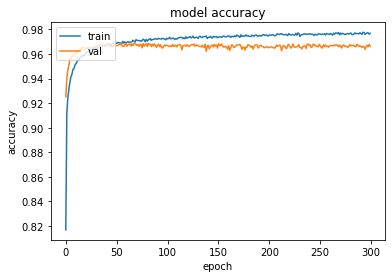

In [11]:
#training the network
history = model_ann.fit(X_train,one_hot_encoded_Y_train,epochs=300,validation_split = 0.1,batch_size=128)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [16]:
#testing the network on testing data
loss, accuracy= model_ann.evaluate(X_test, one_hot_encoded_Y_test, verbose = 0)

print(f'Accuracy: {accuracy*100}')

Accuracy: 96.52000069618225


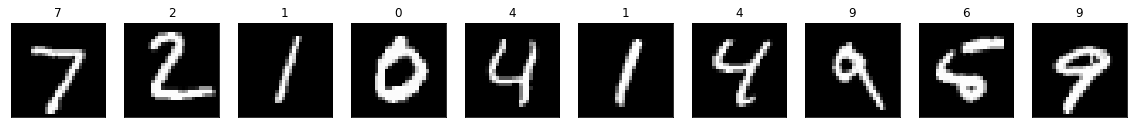

In [13]:
#visualizing the results
predictions = model_ann.predict(X_test)

predictions = np.argmax(predictions, axis=1)

fig, axes = plt.subplots(ncols=10, sharex=False,
                         sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(predictions[i])
    axes[i].imshow(X_test[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()